# 인구소멸위기지역 - 시각화(Part3)

In [18]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import  drive
drive.mount('/content/mnt')

Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


In [5]:
data_folder = '/content/mnt/MyDrive/데이터/인구소멸위기지역'
pop = pd.read_csv(f'{data_folder}/시군구_ID부여.csv', encoding='euc-kr')
pop.head()

,광역시도,시군구,20-39세계,20-39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,소멸위기고위험지역,ID
0,강원도,강릉시,47006,21807,43830,211643,105025,106618,0.497536,True,False,강릉
1,강원도,고성군,5217,2042,7755,26792,13864,12928,0.263314,True,False,고성(강원)
2,강원도,동해시,18727,8258,17572,89814,45572,44242,0.469952,True,False,동해
3,강원도,삼척시,13583,6117,16077,65623,33275,32348,0.380481,True,False,삼척
4,강원도,속초시,18080,8171,15170,81497,40312,41185,0.538629,False,False,속초


## 지도 모양 보기

In [6]:
map_raw = pd.read_excel(f'{data_folder}/draw_korea_raw(2021).xlsx')

In [7]:
map_raw.shape

(27, 14)

In [8]:
map_raw.stack()

0   7         철원
    8         화천
    9         양구
    10    고성(강원)
1   3         양주
           ...  
24  2         장흥
    3         보성
25  2         완도
    5         제주
26  5        서귀포
Length: 250, dtype: object

In [9]:
map = pd.DataFrame(map_raw.stack())
map.reset_index(inplace=True)
print(map.shape)
map.head()

(250, 3)


,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [10]:
map.columns = ['y','x','ID']
map.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [11]:
!cp $data_folder/draw_map.py .

In [15]:
!ls -l

total 16
-rw------- 1 root root 5269 Sep  6 05:57 draw_map.py
drwx------ 5 root root 4096 Sep  6 04:03 mnt
drwxr-xr-x 1 root root 4096 Sep  1 19:26 sample_data


In [14]:
import matplotlib.pyplot as plt

In [12]:
from draw_map import BORDER_LINES, drawKorea, drawKoreaMinus

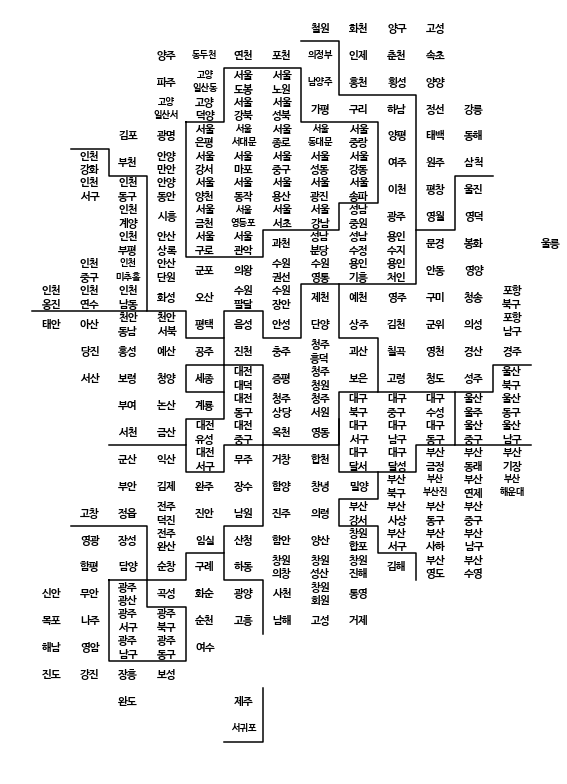

In [15]:
plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in map.iterrows():
    # 광역시는 구 이름이 겹치는 경우가 많아서 광역시 이름도 같이 표시 
    # (중구, 서구 등)
    if len(row.ID.split())==2:
        dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
    elif row.ID[:2]=='고성':
        dispname = '고성'
    else:
        dispname = row.ID

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [16]:
pop = pd.merge(pop, map, how='left', on='ID')
print(pop.shape)
pop.head()

(250, 14)


,광역시도,시군구,20-39세계,20-39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,소멸위기고위험지역,ID,y,x
0,강원도,강릉시,47006,21807,43830,211643,105025,106618,0.497536,True,False,강릉,3,11
1,강원도,고성군,5217,2042,7755,26792,13864,12928,0.263314,True,False,고성(강원),0,10
2,강원도,동해시,18727,8258,17572,89814,45572,44242,0.469952,True,False,동해,4,11
3,강원도,삼척시,13583,6117,16077,65623,33275,32348,0.380481,True,False,삼척,5,11
4,강원도,속초시,18080,8171,15170,81497,40312,41185,0.538629,False,False,속초,1,10


In [17]:
# Null 데이터 존재유무 확인
pop.isnull().sum().sum()

0

## 인구 현황 및 인구 소멸 위기지역 확인

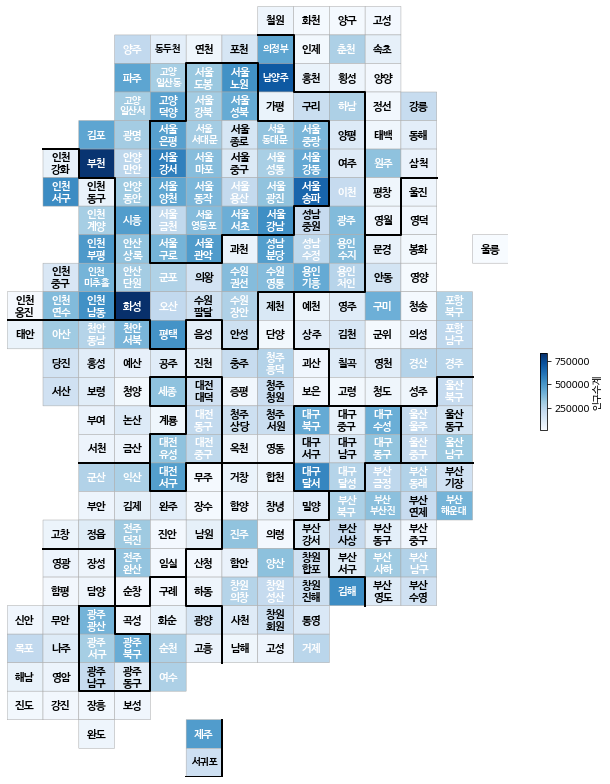

In [18]:
drawKorea('인구수계', pop, 'Blues')

- 인구소멸 위험지역

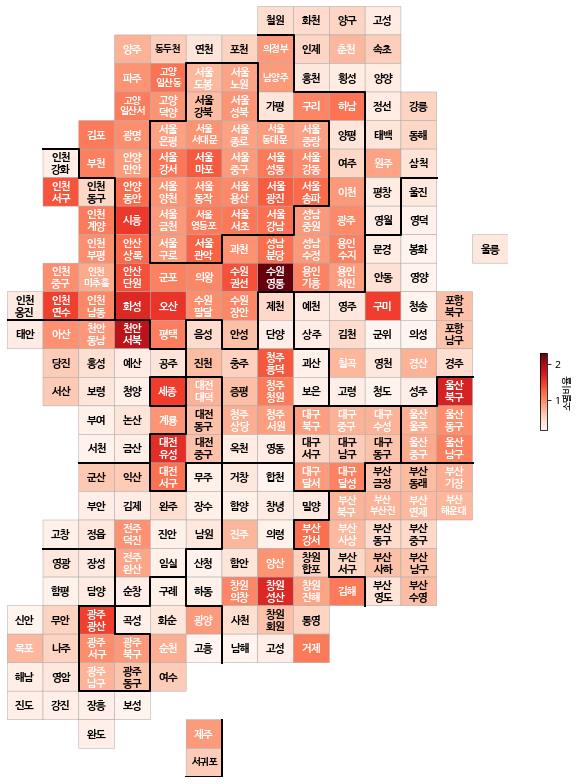

In [19]:
drawKorea('소멸비율', pop, 'Reds')

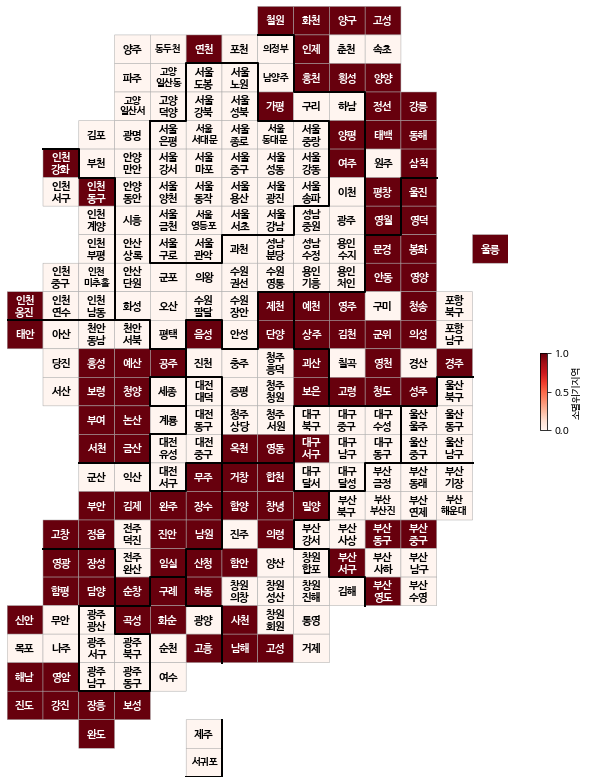

In [20]:
pop['소멸위기지역'] = pop.소멸위기지역.astype(int)
drawKorea('소멸위기지역',pop,'Reds')

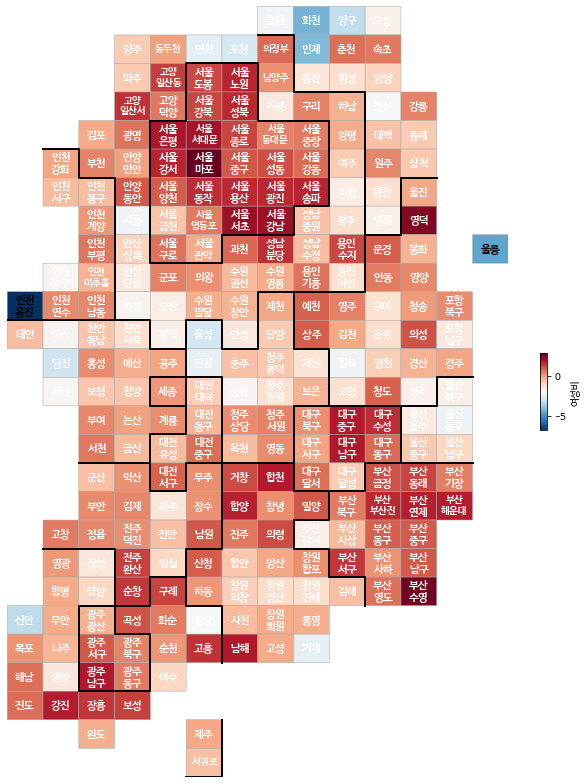

In [24]:
pop['여성비'] = (pop['인구수여자'] / pop['인구수계'] - 0.5) *100
drawKorea('여성비', pop, 'RdBu_r')

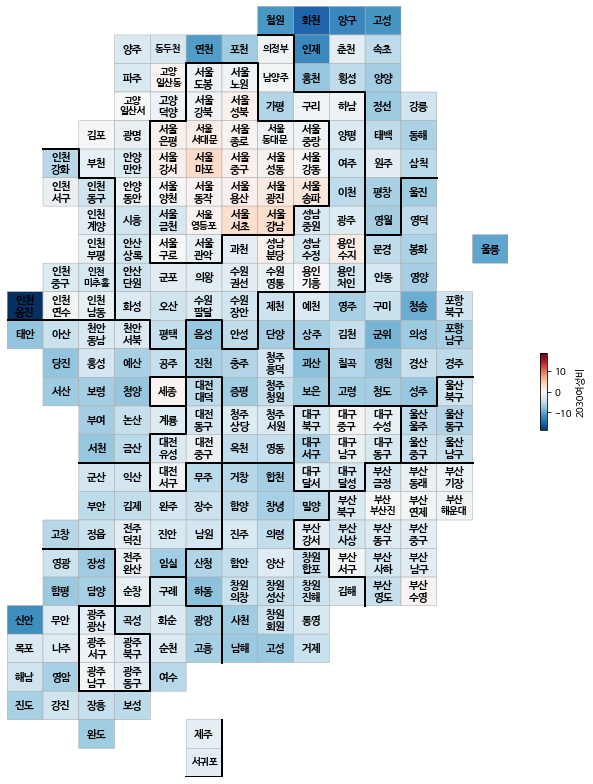

In [25]:
pop['2030여성비'] = (pop['20-39세여자'] / pop['20-39세계'] - 0.5)*100
drawKoreaMinus('2030여성비',pop,'RdBu_r')